## KneeMRI Exploratory Data Analysis

#### Inspect the files

In [1]:
# Explore the directory structure and files in the dataset MRNet
!tree -L 1 Data/KneeMRI/

Data/KneeMRI/
├── metadata-aug.csv
├── metadata.csv
├── vol01
├── vol02
├── vol03
├── vol04
├── vol05
├── vol06
├── vol07
├── vol08
├── vol09
└── vol10

11 directories, 2 files


#### Inspect the MRIs

In [7]:
import pickle
import platform
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Directory where the volumetric data is located
volumetric_data_dir = 'Data/KneeMRI'

# Path to metadata csv file
metadata_csv_path = 'Data/KneeMRI/metadata.csv'

In [90]:
kneemri_labels = {0: 'healthy', 1: 'partially ruptured', 2: 'completely ruptured'}

In [119]:
def plot_slices_per_exam(data_paths):
    """
    This function plots the distibution of slices found in MRIs
    of the KneeMRI dataset.

    Args:
        data_paths (list): List of the directories in KneeMRI dataset
    """
    num_slices_per_exam = []
    for path in data_paths:
        for exam in glob(path + "/*.pck"):
            with open(exam, 'rb') as file_handler:  # Must use 'rb' as the data is binary
                mri_vol = pickle.load(file_handler)
                num_slices_per_exam.append(mri_vol.shape[0])
    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
    fig.suptitle('KneeMRI', fontsize=14)
    num_slices = np.asarray(num_slices_per_exam)
    print(f"For KneeMRI Sagittal plane min : {num_slices.min()}, max : {num_slices.max()}, avg : {num_slices.mean()}")
    sns.histplot(num_slices, stat='density', ax=ax, kde=True)
    ax.set_title("Sagittal Plane Slices Distribution", pad=15)
    plt.show()

In [121]:
mri_vol_paths = glob(volumetric_data_dir + "/vol*")

In [122]:
mri_vol_paths.sort()

In [123]:
mri_vol_paths

['Data/KneeMRI\\vol01',
 'Data/KneeMRI\\vol02',
 'Data/KneeMRI\\vol03',
 'Data/KneeMRI\\vol04',
 'Data/KneeMRI\\vol05',
 'Data/KneeMRI\\vol06',
 'Data/KneeMRI\\vol07',
 'Data/KneeMRI\\vol08',
 'Data/KneeMRI\\vol09',
 'Data/KneeMRI\\vol10']

For KneeMRI Sagittal plane min : 21, max : 45, avg : 30.925845147219192


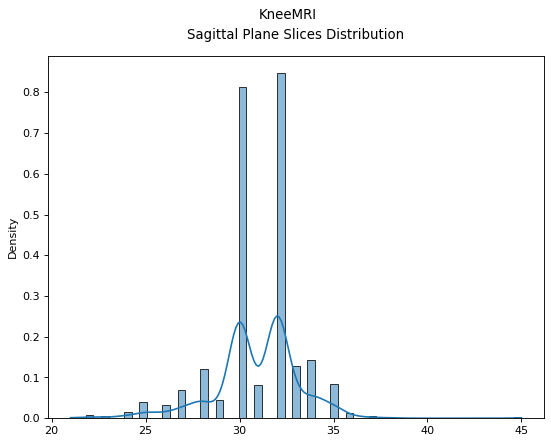

In [124]:
plot_slices_per_exam(mri_vol_paths)

#### Inspecting CSVs

In [14]:
# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True,
                         dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20') 

In [15]:
metadata_df = pd.DataFrame(metadata)

In [16]:
metadata_df

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck
...,...,...,...,...,...,...,...,...,...,...,...
912,1027212,5,1,1,113,127,16,101,99,3,1027212-5.pck
913,1028019,5,1,1,105,102,14,95,100,3,1028019-5.pck
914,1028028,5,0,0,118,84,15,100,100,2,1028028-5.pck
915,1028069,5,0,0,105,97,15,103,106,4,1028069-5.pck


In [12]:
metadata_df[metadata['examId'] == 329637]

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck


In [17]:
metadata_df['aclDiagnosis'].value_counts()

0    690
1    172
2     55
Name: aclDiagnosis, dtype: int64

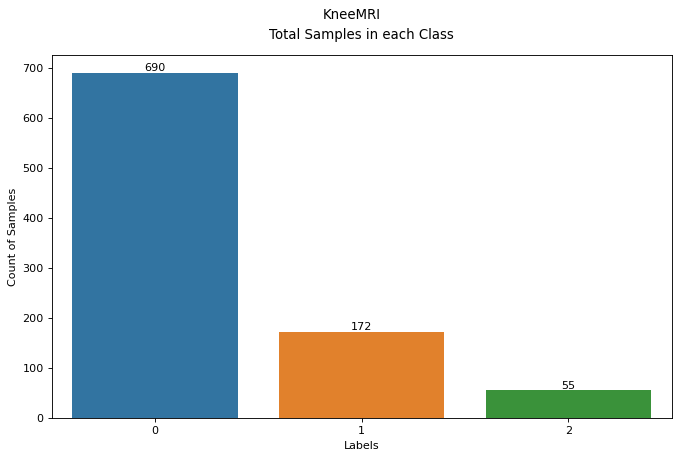

In [118]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI', fontsize=14)
ax = sns.barplot(x=metadata_df['aclDiagnosis'].value_counts().index,
                 y=metadata_df['aclDiagnosis'].value_counts(),
                 ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Labels')
ax.set_ylabel('Count of Samples')
ax.set_title('Total Samples in each Class', pad=15)
plt.show()

In [18]:
metadata_df['kneeLR'].value_counts()

1    469
0    448
Name: kneeLR, dtype: int64

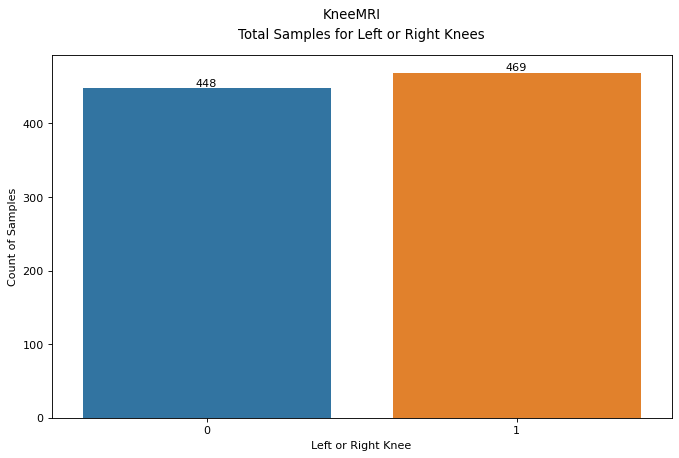

In [117]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI', fontsize=14)
ax = sns.barplot(x=metadata_df['kneeLR'].value_counts().index, 
                 y=metadata_df['kneeLR'].value_counts(), 
                 ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Left or Right Knee')
ax.set_ylabel('Count of Samples')
ax.set_title('Total Samples for Left or Right Knees', pad=15)
plt.show()

In [19]:
metadata_df['aclDiagnosis'].value_counts(normalize=True)*100

0    75.245365
1    18.756816
2     5.997819
Name: aclDiagnosis, dtype: float64

In [61]:
metadata_df['kneeLR'].value_counts(normalize=True)

1    0.51145
0    0.48855
Name: kneeLR, dtype: float64

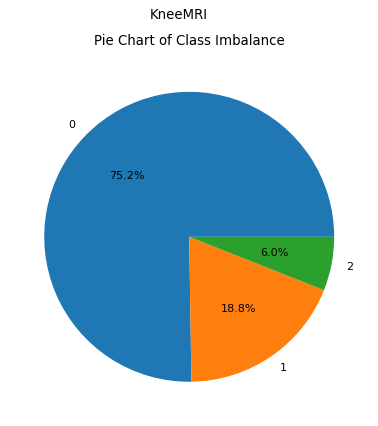

In [116]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI', fontsize=14)
ax.pie(x=metadata_df['aclDiagnosis'].value_counts(), 
       labels=metadata_df['aclDiagnosis'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('Pie Chart of Class Imbalance', pad=10)
plt.show()

## After Pre-processing and Data Augmentation

In [89]:
# Directory where the preprocessed volumetric data is located
preprocessed_kneemri_data_dir = 'Preprocessed_Data/KneeMRI'
# path to metadata csv file
kneemri_metadata_csv_path = 'Data/KneeMRI/metadata.csv'
aug_metadata_csv_path = 'Data/KneeMRI/metadata-aug.csv'

# For running code on Windows
if platform.system() == "Windows":
    preprocessed_kneemri_data_dir = preprocessed_kneemri_data_dir.replace('/', '\\')
    kneemri_metadata_csv_path = kneemri_metadata_csv_path.replace('/', '\\')
    aug_metadata_csv_path = aug_metadata_csv_path.replace('/', '\\')

In [91]:
if platform.system() == "Windows":
    mri_vol_paths = glob(preprocessed_kneemri_data_dir + "\\vol*")
else:
    mri_vol_paths = glob(preprocessed_kneemri_data_dir + "/vol*")
mri_vol_paths.sort()

In [92]:
cases = []
for mri_data_path in mri_vol_paths:
    if platform.system() == "Windows":
        all_exams = glob(mri_data_path + "\\*.npy")
    else:
        all_exams = glob(mri_data_path + "/*.npy")
    all_exams.sort()
    cases.extend(all_exams)

In [93]:
aug_cases = []
for mri_data_path in mri_vol_paths:
    if platform.system() == "Windows":
        all_exams = glob(mri_data_path + "\\aug\\*.npy")
    else:
        all_exams = glob(mri_data_path + "/aug/*.npy")
    all_exams.sort()
    aug_cases.extend(all_exams)

In [94]:
filenames = []
filenames.extend(cases)
filenames.extend(aug_cases)
filenames.sort()

In [95]:
len(filenames)

1567

In [96]:
# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(kneemri_metadata_csv_path, delimiter=',', names=True, 
                         dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20')
metadata_df = pd.DataFrame(metadata)
aug_metadata_df = pd.read_csv(aug_metadata_csv_path, index_col=0)
full_metadata_df = pd.concat([metadata_df, aug_metadata_df], ignore_index=True)

In [97]:
len(full_metadata_df)

1567

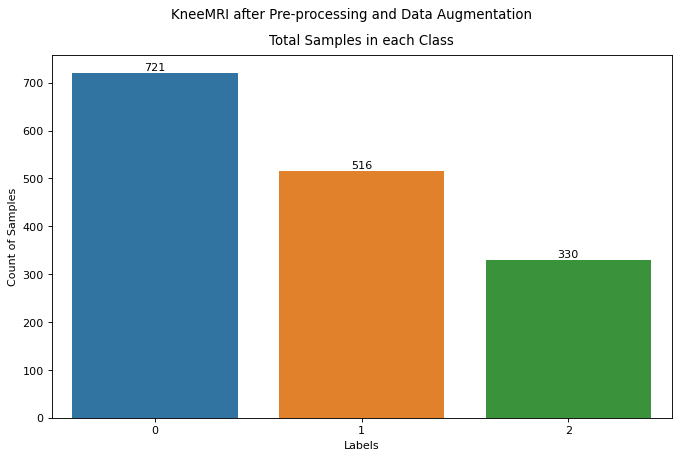

In [112]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI after Pre-processing and Data Augmentation', fontsize=14)
ax = sns.barplot(x=full_metadata_df['aclDiagnosis'].value_counts().index, 
                 y=full_metadata_df['aclDiagnosis'].value_counts(), 
                 ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Labels')
ax.set_ylabel('Count of Samples')
ax.set_title('Total Samples in each Class', pad=10)
plt.show()

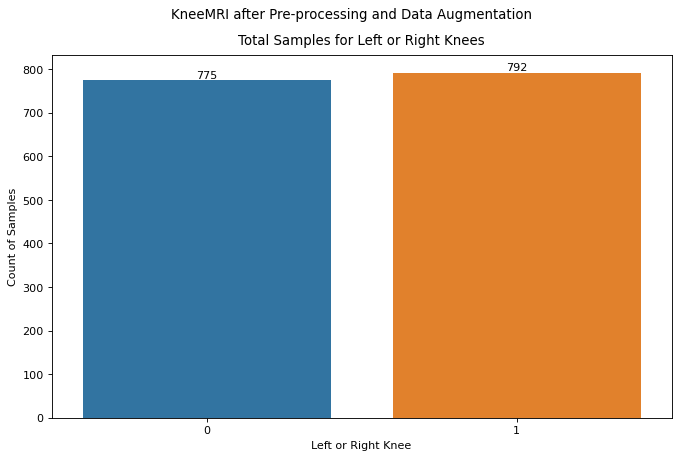

In [109]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI after Pre-processing and Data Augmentation', fontsize=14)
ax = sns.barplot(x=full_metadata_df['kneeLR'].value_counts().index, 
                 y=full_metadata_df['kneeLR'].value_counts(), 
                 ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Left or Right Knee')
ax.set_ylabel('Count of Samples')
ax.set_title('Total Samples for Left or Right Knees', pad=10)
plt.show()

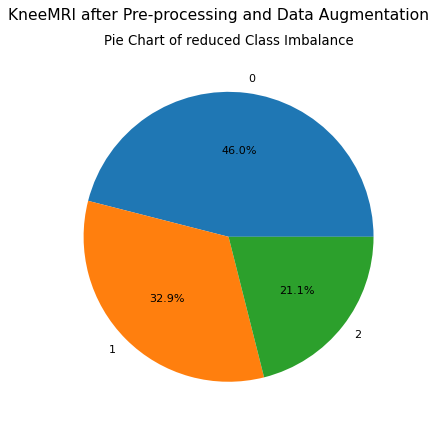

In [131]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('KneeMRI after Pre-processing and Data Augmentation', fontsize=14)
ax.pie(x=full_metadata_df['aclDiagnosis'].value_counts(), 
       labels=full_metadata_df['aclDiagnosis'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('Pie Chart of reduced Class Imbalance', pad=10)
plt.show()